# Decision Tree

* Can be used for both classification and regression tasks
* Can be used for complex data
* No scaling of data / any data preparation is required
* It can handle both categorical/ numerical values
* Can lead to overfitting, due to high variance and bias

Two important terminologies:

1) Entropy -> uncertainty / randomness

2) Information gain -> change in entropy (E(before_split) - E(after_split))


For classification tasks that are

1) simple -> Naive Bayes, Logistic Regression

2) complex -> Decision Trees, Random Forest

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('loan_repayment_dataset.csv')
data

,Initial_Payment,Last_Payment,Credit_Score,House_Number,Sum,Result
0,4174,4322,522,1284,8496,Paid
1,4507,1876,671,660,6383,Paid
2,1860,2028,701,2011,3888,Paid
3,2294,4190,742,8591,6484,Paid
4,2130,2015,789,1734,4145,Default
...,...,...,...,...,...,...
995,3497,4911,602,7889,8408,Default
996,1009,2521,417,6475,3530,Paid
997,3871,1826,460,9739,5697,Paid
998,1797,1726,700,4959,3523,Paid


In [12]:
x = data.values[:, 0:5]
y = data.values[:, 5]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
def _acc_dt(criterion, max_depth, min_samples_leaf):
  clf = DecisionTreeClassifier(criterion=criterion, random_state=100, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(accuracy)

In [14]:
acc1 = _acc_dt('entropy', 3, 5)

0.7433333333333333


In [15]:
acc1 = _acc_dt('gini', 10, 10)

0.6933333333333334


In [16]:
acc1 = _acc_dt('entropy', 5, 5)

0.7266666666666667


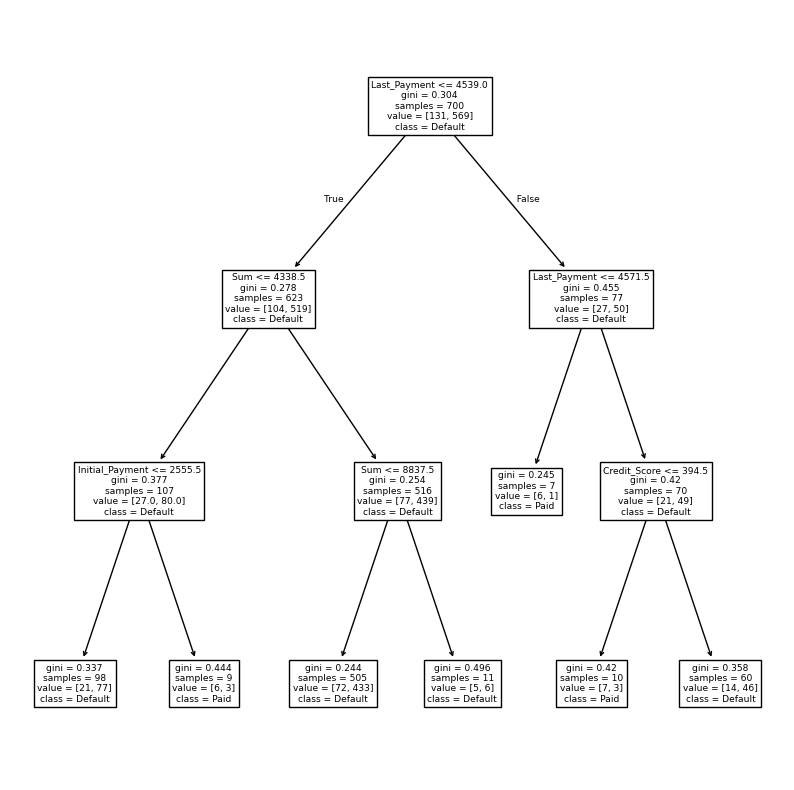

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize= (10, 10))
clf = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
clf.fit(x_train, y_train)
plot_tree(clf, feature_names= data.columns[:5], class_names = ['Paid', 'Default'])
plt.show()

# Bias - variance
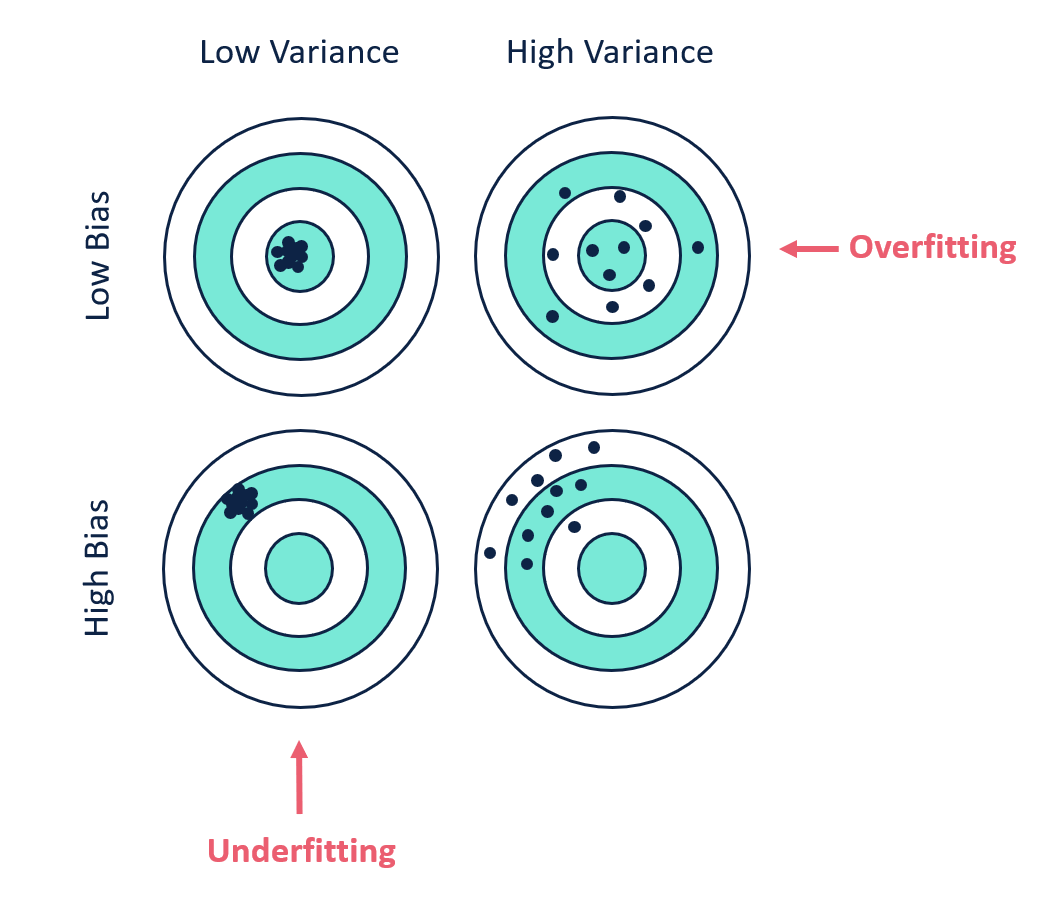